In [ ]:
try:
    import jax
except:
    %pip install --upgrade -q pip jax jaxlib
    import jax

import jax.numpy as jnp
from typing import Any, Callable, Sequence, Optional
from jax import lax, random, numpy as jnp

try:
    import flax
except:
    %pip install --upgrade -q git+https://github.com/google/flax.git
    import flax

from flax.core import freeze, unfreeze
from flax import linen as nn

try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt
    
try:
    from probml_utils import savefig, latexify
except:
    %pip install git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify




     |████████████████████████████████| 140 kB 4.0 MB/s 
     |████████████████████████████████| 72 kB 446 kB/s 
  Cloning https://github.com/probml/probml-utils.git to /tmp/pip-req-build-zcmydn2a
  Running command git clone -q https://github.com/probml/probml-utils.git /tmp/pip-req-build-zcmydn2a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 272 kB 3.9 MB/s 
  Created wheel for probml-utils: filename=probml_utils-0.1.dev48+gb130363-py3-none-any.whl size=32273 sha256=47e81e14f01023ad4192ba304e0d445eb395353b25ab1b3f8be3527b6c31bc6c
  Stored in directory: /tmp/pip-ephem-wheel-cache-y7t5fr7f/wheels/37/8f/cb/b845cd5de3d7f648717815f9c27bec49975bf58637a97fa6be
  Created wheel for TexSoup: filename=TexSoup-0.3.1-py3-none-any.whl size=27666 sha256=a6a347fb7f5572906d948f089a1df2b67399f70317448edab31a6a5258a3d728
  Stored in directory: /root/.cache/pip/wheels/2b/8e/c6/7ee3f9f97

In [ ]:
latexify(width_scale_factor=2)

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [ ]:
class MLP(nn.Module):
  features: Sequence[int]
  alpha: Sequence[int]
  beta: Sequence[int]

  def setup(self):
    self.layers = [nn.Dense(feat,kernel_init=jax.nn.initializers.normal(self.alpha[i]),bias_init=jax.nn.initializers.normal(self.beta[i])) for i,feat in enumerate(self.features)]

  def __call__(self, inputs):
    x = inputs
    for i, lyr in enumerate(self.layers):
      x = lyr(x)
      if i != len(self.layers) - 1:
        x = nn.tanh(x)
    return x


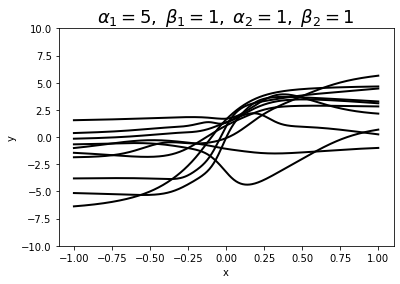

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


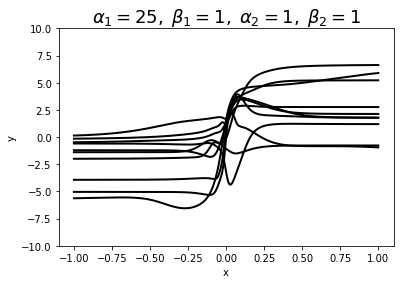

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


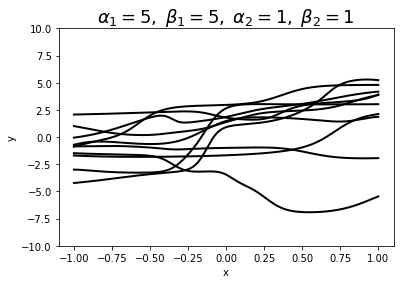

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


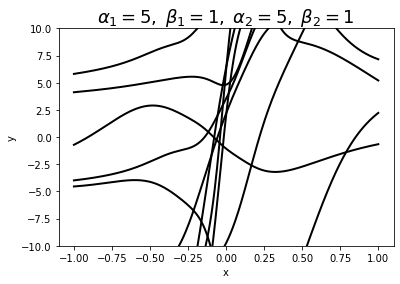

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


In [ ]:
def mlp_output(parameters,save_name):
    nsample=10  
    for i in range(nsample):
      key = random.PRNGKey(i)
      model = MLP(parameters['features'],parameters['alpha'],parameters['beta'])
      params = model.init(key,x)
      y = model.apply(params, x)

      plt.plot(x, y, color='k', lw=2)
      plt.ylim([-10, 10])
      plt.xlabel('x')
      plt.ylabel('y')
      ttl = r'$\alpha_1 = {},\; \beta_1 = {},\; \alpha_2 = {},\; \beta_2 = {}$'.format(
          parameters['alpha'][0],parameters['beta'][0], parameters['alpha'][1],parameters['beta'][1])
      plt.title(ttl, fontsize=18)

    plt.show()  
    if len(save_name) > 0:
        savefig("/images",save_name)




ntrials = 4
x = jnp.arange(-1, 1.005, 0.005).reshape(-1,1)
nsample = 10

nhidden = 12
nout = 1
features=[nhidden,nout]
a=[[5,1],[25,1],[5,1],[5,5]]
b=[[1,1],[1,1],[5,1],[1,1]]

parameters={'alpha':[5,1],'beta':[1,1],'features':features}
mlp_output(parameters,"image1.pdf")

parameters={'alpha':[25,1],'beta':[1,1],'features':features}
mlp_output(parameters,"image1.pdf")

parameters={'alpha':[5,1],'beta':[5,1],'features':features}
mlp_output(parameters,"image1.pdf")

parameters={'alpha':[5,5],'beta':[1,1],'features':features}
mlp_output(parameters,"image1.pdf")



In [ ]:
from ipywidgets import interact


@interact(alpha1=(1,25),beta1=(1,25),alpha2=(1,25),beta2=(1,25))
def animate_gp_regression(alpha1=1,beta1=1,alpha2=1,beta2=1):
    parameters={'alpha':[alpha1,alpha2],'beta':[beta1,beta2],'features':features}
    mlp_output(parameters,"")

interactive(children=(IntSlider(value=1, description='alpha1', max=25, min=1), IntSlider(value=1, description=…